In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import qgrid
import seaborn as sbn
import plotly.offline as py
import plotly.graph_objs as go
from ggplot import *
import numpy as np

C:\Users\ROZASR\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning:

pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp

C:\Users\ROZASR\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning:

The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead

C:\Users\ROZASR\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [2]:
data = pd.read_excel('C:/Users/ROZASR/Documents/data/METEO_totale.xlsx')

In [3]:
magasin = pd.read_excel("c:/Users/ROZASR/Documents/data/liste magasin.xlsx")

In [4]:
data['DATE_KEY'] = pd.to_datetime(data.DATE_KEY, format="%Y%m%d")
data['WEATHER_DATETIME'] = pd.to_datetime(data.WEATHER_DATETIME, format="%Y%m%d")
magasin['Code EAN'] = magasin['Code EAN'].astype(str)
data['STO_EAN'] = data['STO_EAN'].astype(str)

In [5]:
data = data.merge(magasin,left_on= u'STO_EAN', right_on=u'Code EAN')

In [6]:
import ipywidgets as widgets
eanW = widgets.Select(options= data.LIBELE.unique().tolist(),value="MOULINS")
prev_typeW = widgets.Select(options= data.WEATHER_TYPE.unique().tolist(), )

def f(ean, prev_type ):
    tmp = data[(data.LIBELE == ean) & (data.WEATHER_TYPE == prev_type)]
    g = ggplot(aes(x='DATE_KEY', y='TEMPERATURE_VALUE_AVG', color='LIBELE'), data=tmp)  + geom_line()
    display(g)

i = widgets.interact(f,ean = eanW, prev_type = prev_typeW )

A Jupyter Widget

In [7]:
data.columns

Index(['DATE_KEY', 'STO_EAN', 'WEATHER_TYPE', 'WEATHER_DATETIME',
       'TEMPERATURE_VALUE_AVG', 'TEMPERATURE_VALUE_MIN',
       'TEMPERATURE_VALUE_MAX', 'PRECIPITATION_VALUE', 'SUNSHINE_DURATION',
       'SNOW_DEPTH', 'SUNSHINE_DURATION_PCT', 'Code Thales', 'Code Atica',
       'Code Prolog_x', 'Code EAN', 'Code THALES', 'LIBELE', 'Code Prolog_y',
       'Code Postal', 'Ville'],
      dtype='object')

In [8]:
to_remove = [ u'Code Prolog_x', u'Code Prolog_y',  u'Code EAN', u'Code Atica', u'Code Thales', u'Code THALES'  ]
for c in to_remove : 
    if c in data.columns : 
        del data[ c]


In [9]:
data['SNOW'] = data.SNOW_DEPTH > 0

In [10]:
current_meteo = data[data.WEATHER_TYPE == 0]
prevision_meteo = data[data.WEATHER_TYPE != 0]

In [11]:
data2 = prevision_meteo.merge(current_meteo, left_on=[u'DATE_KEY', u'STO_EAN', "Code Postal", "LIBELE", "Ville" ], 
                      right_on = [u'WEATHER_DATETIME', u'STO_EAN',  "Code Postal", "LIBELE", "Ville" ], suffixes = ("_PREVISION","_CURRENT"))

In [12]:
data2.columns

Index(['DATE_KEY_PREVISION', 'STO_EAN', 'WEATHER_TYPE_PREVISION',
       'WEATHER_DATETIME_PREVISION', 'TEMPERATURE_VALUE_AVG_PREVISION',
       'TEMPERATURE_VALUE_MIN_PREVISION', 'TEMPERATURE_VALUE_MAX_PREVISION',
       'PRECIPITATION_VALUE_PREVISION', 'SUNSHINE_DURATION_PREVISION',
       'SNOW_DEPTH_PREVISION', 'SUNSHINE_DURATION_PCT_PREVISION', 'LIBELE',
       'Code Postal', 'Ville', 'SNOW_PREVISION', 'DATE_KEY_CURRENT',
       'WEATHER_TYPE_CURRENT', 'WEATHER_DATETIME_CURRENT',
       'TEMPERATURE_VALUE_AVG_CURRENT', 'TEMPERATURE_VALUE_MIN_CURRENT',
       'TEMPERATURE_VALUE_MAX_CURRENT', 'PRECIPITATION_VALUE_CURRENT',
       'SUNSHINE_DURATION_CURRENT', 'SNOW_DEPTH_CURRENT',
       'SUNSHINE_DURATION_PCT_CURRENT', 'SNOW_CURRENT'],
      dtype='object')

In [13]:
t = [u'TEMPERATURE_VALUE_AVG', u'TEMPERATURE_VALUE_MAX', u'TEMPERATURE_VALUE_MIN', u'PRECIPITATION_VALUE',  u'SUNSHINE_DURATION', "SNOW_DEPTH"  ]
for c in t :
    data2["Delta_%s" %c ] = abs(data2[u'%s_PREVISION'%c] - data2[u'%s_CURRENT'%c])
    data2["APE_%s" %c ] = abs(data2[u'%s_PREVISION'%c] - data2[u'%s_CURRENT'%c]) / (data2[u'%s_CURRENT'%c] + 0.01)

In [14]:
from imp import reload
import ggplot
reload(ggplot)
from ggplot import *

In [31]:
import ipywidgets as widgets
eanW = widgets.Select(options= data2.LIBELE.unique().tolist(),value="MOULINS")
prev_typeW = widgets.Select(options= data2.WEATHER_TYPE_PREVISION.unique().tolist(), )
fieldW = widgets.Select(options= data2.columns.tolist() )
def f(ean, prev_type, field ):
    tmp = data2[(data2.LIBELE == ean) & (data2.WEATHER_TYPE_PREVISION == prev_type)]
    g = ggplot(aes(x='DATE_KEY_CURRENT', y=field, color='LIBELE'), data=tmp)\
    + theme(axis_text_x = element_text(angle = 45, hjust = 1))\
    + geom_point(shape='*')\
    + stat_smooth(se = False, method = "ma", window = 30, color = 'black')
    display(g)

i = widgets.interact(f,ean = eanW, prev_type = prev_typeW, field = fieldW )

A Jupyter Widget

In [16]:
data2.groupby("WEATHER_TYPE_PREVISION").mean()

,TEMPERATURE_VALUE_AVG_PREVISION,TEMPERATURE_VALUE_MIN_PREVISION,TEMPERATURE_VALUE_MAX_PREVISION,PRECIPITATION_VALUE_PREVISION,SUNSHINE_DURATION_PREVISION,SNOW_DEPTH_PREVISION,SUNSHINE_DURATION_PCT_PREVISION,SNOW_PREVISION,WEATHER_TYPE_CURRENT,TEMPERATURE_VALUE_AVG_CURRENT,...,Delta_TEMPERATURE_VALUE_MAX,APE_TEMPERATURE_VALUE_MAX,Delta_TEMPERATURE_VALUE_MIN,APE_TEMPERATURE_VALUE_MIN,Delta_PRECIPITATION_VALUE,APE_PRECIPITATION_VALUE,Delta_SUNSHINE_DURATION,APE_SUNSHINE_DURATION,Delta_SNOW_DEPTH,APE_SNOW_DEPTH
WEATHER_TYPE_PREVISION,,,,,,,,,,,,,,,,,,,,,
1,12.514546,7.573270,17.455881,2.455034,6.728256,0.251663,52.857220,0.074760,0,12.497603,...,1.159216,0.233379,1.249111,0.302905,1.901485,26.444024,2.237300,25.349468,0.100241,7.108660
2,12.503801,7.555501,17.451966,2.469020,6.785618,0.248431,53.196294,0.093509,0,12.497603,...,2.434637,0.306280,2.373430,0.827151,2.689648,62.380657,3.259351,49.549644,0.274561,12.060824
3,12.501980,7.548299,17.455359,2.450893,6.857359,0.245201,53.800859,0.100829,0,12.497603,...,3.237184,0.399164,2.827161,0.995875,3.495480,119.600843,3.640377,58.231207,0.317105,14.771620
4,12.512087,7.555353,17.468674,2.360366,6.899629,0.246740,54.077845,0.106912,0,12.497603,...,3.609340,0.511592,3.052863,1.207731,3.502733,124.873864,3.727192,60.032346,0.330229,15.584643
5,12.517850,7.560378,17.475333,2.209690,6.937434,0.239253,54.402556,0.114891,0,12.497603,...,3.716595,0.597834,3.153513,0.978016,3.480889,119.882811,3.714608,61.498299,0.339179,16.900884
6,12.519234,7.563072,17.475392,2.333221,6.928883,0.246159,54.293683,0.113417,0,12.497603,...,3.841623,0.544474,3.239187,1.091681,3.587656,131.438453,3.694680,61.489240,0.345938,17.815994
7,12.518626,7.560584,17.476678,2.245709,6.928552,0.265822,54.187108,0.113864,0,12.497603,...,3.818333,0.508350,3.256186,1.226480,3.495204,127.481855,3.640050,62.370791,0.367217,20.028183
8,12.514297,7.556324,17.472266,1.544777,6.932365,0.000000,54.175991,0.000000,0,12.497603,...,3.809574,0.522703,3.256510,1.252579,2.839625,86.992717,3.642691,63.076477,0.164464,0.050882
9,12.495440,7.538340,17.452542,1.418347,6.919393,0.000000,54.038630,0.000000,0,12.497603,...,3.791796,0.497825,3.228183,1.335912,2.744158,77.058985,3.646378,63.144353,0.164464,0.050882


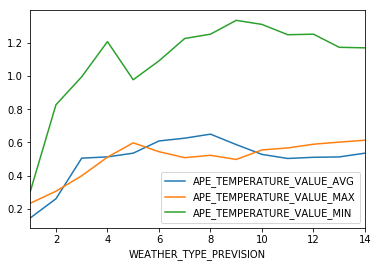

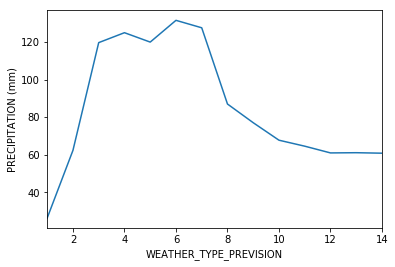

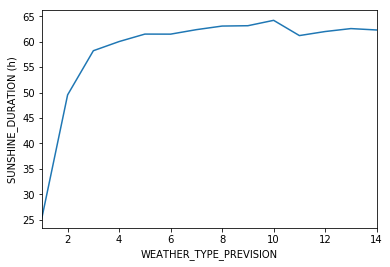

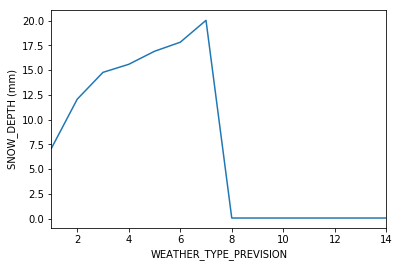

In [17]:
data2.groupby("WEATHER_TYPE_PREVISION")["APE_TEMPERATURE_VALUE_AVG", "APE_TEMPERATURE_VALUE_MAX", "APE_TEMPERATURE_VALUE_MIN" ].mean().plot()
plt.show()
ax = data2.groupby("WEATHER_TYPE_PREVISION")["APE_PRECIPITATION_VALUE"].mean().plot()
ax.set_ylabel("PRECIPITATION (mm)")
plt.show()
ax = data2.groupby("WEATHER_TYPE_PREVISION")["APE_SUNSHINE_DURATION"].mean().plot()
ax.set_ylabel("SUNSHINE_DURATION (h)")
plt.show()
ax = data2.groupby("WEATHER_TYPE_PREVISION")["APE_SNOW_DEPTH"].mean().plot()
ax.set_ylabel("SNOW_DEPTH (mm)")
plt.show()

In [52]:
t = 1
pd.crosstab(pd.cut(data2.TEMPERATURE_VALUE_AVG_CURRENT[data2.WEATHER_TYPE_PREVISION == t] , 10), pd.cut(data2.Delta_TEMPERATURE_VALUE_AVG[data2.WEATHER_TYPE_PREVISION == t], 10), normalize = 'index' )

Delta_TEMPERATURE_VALUE_AVG,"(-0.00731, 0.731]","(0.731, 1.462]","(1.462, 2.192]","(2.192, 2.923]","(2.923, 3.654]","(3.654, 4.385]","(4.385, 5.116]","(5.116, 5.846]","(5.846, 6.577]","(6.577, 7.308]"
TEMPERATURE_VALUE_AVG_CURRENT,,,,,,,,,,
"(-8.289, -4.315]",0.105634,0.450704,0.140845,0.084507,0.197183,0.000000,0.000000,0.000000,0.021127,0.000000
"(-4.315, -0.38]",0.380066,0.249726,0.157722,0.072289,0.076670,0.044907,0.008762,0.003286,0.003286,0.003286
"(-0.38, 3.555]",0.463786,0.310712,0.140596,0.047474,0.014912,0.012477,0.007304,0.001826,0.000913,0.000000
"(3.555, 7.49]",0.515075,0.269665,0.141149,0.048341,0.017012,0.004885,0.001853,0.001516,0.000505,0.000000
"(7.49, 11.425]",0.482978,0.346951,0.108504,0.040852,0.013328,0.004781,0.001304,0.000869,0.000435,0.000000
"(11.425, 15.36]",0.516932,0.319052,0.112633,0.035483,0.010012,0.003681,0.000442,0.001767,0.000000,0.000000
"(15.36, 19.295]",0.553432,0.306681,0.106864,0.022168,0.006115,0.000917,0.002293,0.001070,0.000000,0.000459
"(19.295, 23.23]",0.613768,0.282970,0.077446,0.024014,0.001201,0.000600,0.000000,0.000000,0.000000,0.000000
"(23.23, 27.165]",0.594749,0.269212,0.108831,0.005728,0.021480,0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
np.histogram2d(data2.TEMPERATURE_VALUE_AVG_CURRENT[data2.WEATHER_TYPE_PREVISION == t] , data2.Delta_TEMPERATURE_VALUE_AVG[data2.WEATHER_TYPE_PREVISION == t] )

(array([[  1.50000000e+01,   6.40000000e+01,   2.00000000e+01,
           1.20000000e+01,   2.80000000e+01,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   3.00000000e+00,
           0.00000000e+00],
        [  3.47000000e+02,   2.28000000e+02,   1.44000000e+02,
           6.60000000e+01,   7.00000000e+01,   4.10000000e+01,
           8.00000000e+00,   3.00000000e+00,   3.00000000e+00,
           3.00000000e+00],
        [  1.52400000e+03,   1.02100000e+03,   4.62000000e+02,
           1.56000000e+02,   4.90000000e+01,   4.10000000e+01,
           2.40000000e+01,   6.00000000e+00,   3.00000000e+00,
           0.00000000e+00],
        [  3.05800000e+03,   1.60100000e+03,   8.38000000e+02,
           2.87000000e+02,   1.01000000e+02,   2.90000000e+01,
           1.10000000e+01,   9.00000000e+00,   3.00000000e+00,
           0.00000000e+00],
        [  3.33400000e+03,   2.39500000e+03,   7.49000000e+02,
           2.82000000e+02,   9.20000000e+01,   3.30000000e+01,
      

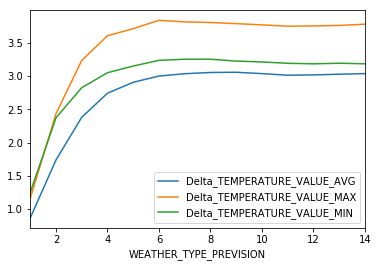

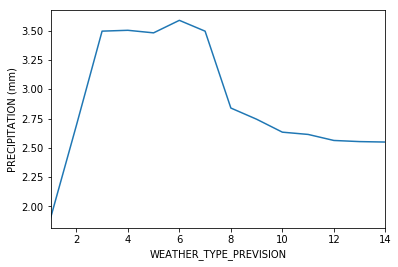

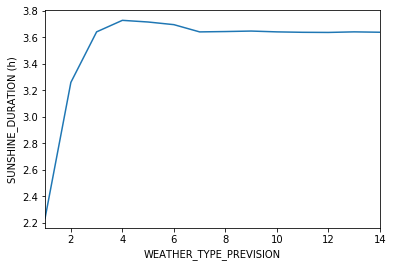

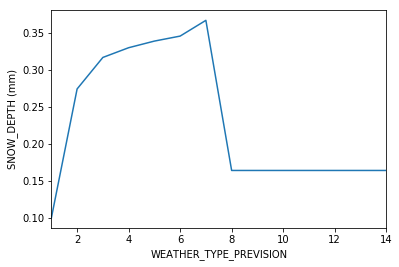

In [44]:
data2.groupby("WEATHER_TYPE_PREVISION")["Delta_TEMPERATURE_VALUE_AVG", "Delta_TEMPERATURE_VALUE_MAX", "Delta_TEMPERATURE_VALUE_MIN" ].mean().plot()
plt.show()
ax = data2.groupby("WEATHER_TYPE_PREVISION")["Delta_PRECIPITATION_VALUE"].mean().plot()
ax.set_ylabel("PRECIPITATION (mm)")
plt.show()
ax = data2.groupby("WEATHER_TYPE_PREVISION")["Delta_SUNSHINE_DURATION"].mean().plot()
ax.set_ylabel("SUNSHINE_DURATION (h)")
plt.show()
ax = data2.groupby("WEATHER_TYPE_PREVISION")["Delta_SNOW_DEPTH"].mean().plot()
ax.set_ylabel("SNOW_DEPTH (mm)")
plt.show()

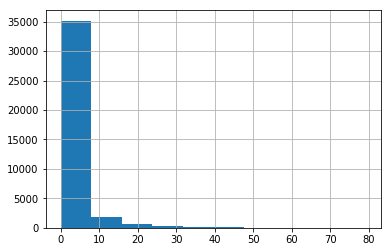

In [15]:
current_meteo.PRECIPITATION_VALUE.hist(bins=10)
plt.show()

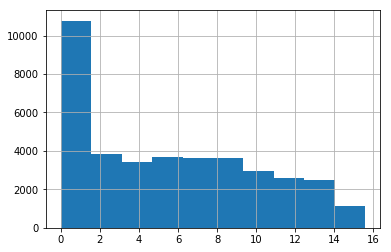

In [16]:
current_meteo.SUNSHINE_DURATION.hist(bins=10)
plt.show()

In [17]:
data2["Delta_shunshine"] = abs(data2[u'SUNSHINE_DURATION_PREVISION'] - data2[u'SUNSHINE_DURATION_CURRENT'])

In [18]:
data2["Delta_snow"] = data2[u'SNOW_PREVISION'] == data2[u'SNOW_CURRENT']

In [19]:
pd.crosstab(data2.WEATHER_TYPE_PREVISION, data2.Delta_snow, normalize='index') * 100

Delta_snow,False,True
WEATHER_TYPE_PREVISION,,
1,2.377880,97.622120
2,5.695853,94.304147
3,7.849901,92.150099
4,8.710994,91.289006
5,10.056616,89.943384
6,10.393680,89.606320
7,10.886109,89.113891
8,5.219223,94.780777
9,5.219223,94.780777


In [20]:
pd.crosstab(data2.WEATHER_TYPE_PREVISION, data2.SNOW_PREVISION, normalize='index') * 100

SNOW_PREVISION,False,True
WEATHER_TYPE_PREVISION,,
1,92.524029,7.475971
2,90.649111,9.350889
3,89.917051,10.082949
4,89.308756,10.691244
5,88.510862,11.489138
6,88.658328,11.341672
7,88.613562,11.386438
8,100.000000,0.000000
9,100.000000,0.000000


In [26]:
import ipywidgets as widgets
eanW = widgets.Select(options= data2.LIBELE.unique().tolist(),value="MOULINS")
prev_typeW = widgets.Select(options= data2.WEATHER_TYPE_PREVISION.unique().tolist())

def f(ean, prev_type ):
    tmp = data2[(data2.LIBELE == ean) & (data2.WEATHER_TYPE_PREVISION == prev_type)]
    g = ggplot(aes(x='DATE_KEY_CURRENT', y='Delta_TEMPERATURE_VALUE_AVG', color='LIBELE'), data=tmp)  + geom_line()
    display(g)

i = widgets.interact(f,ean = eanW, prev_type = prev_typeW )

interactive(children=(Select(description=u'ean', index=4, options=(u'CHAMBERY -BASSENS', u"L'ISLE D'ABEAU", u'CRECHES S/SAONE', u'BESANCON -VALENTIN', u'MOULINS', u'GRENOBLE -MEYLAN', u'BESANCON -CHALEZEULE', u'VAULX EN VELIN', u'FEURS', u'MONTLUCON', u'GIVORS', u'LYON -CONFLUENCE', u'SEGNY', u'MABLY', u'THIERS', u'ST EGREVE', u'FRANCHEVILLE', u'CHALON S/SAONE -SUD', u'BOURG EN BRESSE', u'CHALON S/SAONE -NORD', u'LYON -LA PART DIEU', u'ANNECY', u'RIOM', u"DIJON TOISON D'OR", u'SALAISE S/SANNE', u'GRENOBLE -GD PLACE', u'MULHOUSE -ILLZACH', u'VILLEURBANNE', u'QUETIGNY', u'VENISSIEUX', u'EPINAL -JEUXEY', u'SALLANCHES', u'ECULLY', u'CHAMBERY -CHAMNORD', u'BEAUNE'), value=u'MOULINS'), Select(description=u'prev_type', options=(1L, 2L, 3L, 4L, 5L, 6L, 7L, 8L, 9L, 10L, 11L, 12L, 13L, 14L), value=1L), Output()), _dom_classes=('widget-interact',))

In [29]:
data2.rolling(10).mean()

NotImplementedError: ops for Rolling for this dtype datetime64[ns] are not implemented

In [175]:
w.on_trait_change

C:\Users\ROZASR\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

on_trait_change is deprecated in traitlets 4.1: use observe instead



TypeError: None is not a Python function

CRECHES S/SAONE


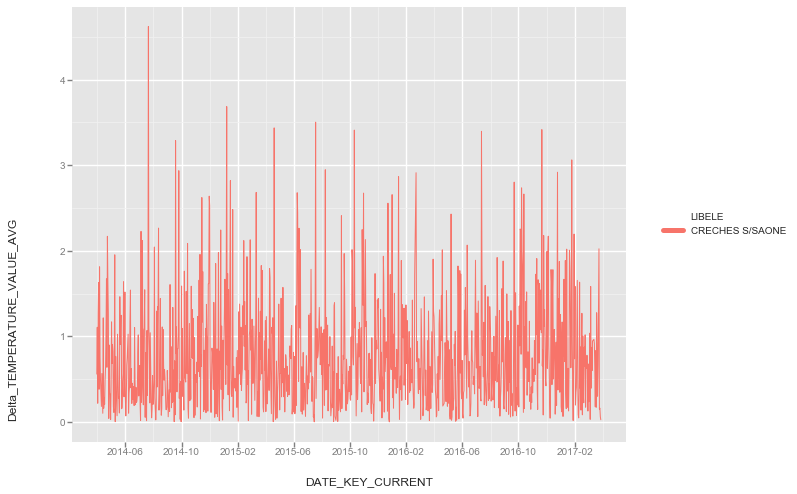

<ggplot: (42219924)>

In [181]:
ean = data2.LIBELE.sample(1).tolist()[0]
print ean
tmp = data2[(data2.LIBELE == ean) & (data2.WEATHER_TYPE_PREVISION == 1)]
g=ggplot(aes(x='DATE_KEY_CURRENT', y='Delta_TEMPERATURE_VALUE_AVG', color='LIBELE'), data=tmp)  + geom_line()
display(g)
#plt.plot(tmp.DATE_KEY_CURRENT, tmp.Delta_TEMPERATURE_VALUE_AVG.rolling(90).mean(),)
#plt.show()

In [151]:
data2.STO_EAN.sample(1).tolist()[0]

'3020474410000'

In [129]:
fig, ax = plt.subplots(35,0)
for i,ean in enumerate(data2.STO_EAN.unique()):
    tmp = data2[(data2.STO_EAN != "3020470080000") & (data2.WEATHER_TYPE_PREVISION == 1)]
    plt.plot(tmp.DATE_KEY_CURRENT, tmp.Delta_TEMPERATURE_VALUE_AVG.rolling(90).mean(),)

plt.show()
    

0
0
3020470080000
1
1
3020339727600
2
2
3020474410000
3
3
3020470360000
4
4
3020472010000
0
5
3020470150000
1
6
3020339420200
2
7
3021080711600
3
8
3021080711100
4
9
3021080711300
0
10
3020470270000
1
11
3020476122600
2
12
3021080710900
3
13
3021080710500
4
14
3021080730600
0
15
3021080594600
1
16
3021080711400
2
17
3020474420000
3
18
3020472050000
4
19
3020474400000
0
20
3020339803500
1
21
3020470050000
2
22
3021080736200
3
23
3020470420000
4
24
3021080711500
0
25
3020470090000
1
26
3020339800900
2
27
3020470020000
3
28
3020470060000
4
29
3020470030000
0
30
3020339420500
1
31
3021080710800
2
32
3020470170000
3
33
3020470300000
4
34
3020476109700


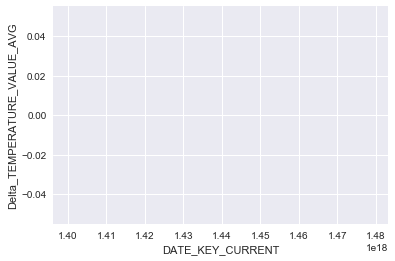

In [121]:
tmp = data2[(data2.STO_EAN == "3020470080000") & (data2.WEATHER_TYPE_PREVISION == 1)]
sbn.tsplot(tmp[0:1000] ,time="DATE_KEY_CURRENT", value="Delta_TEMPERATURE_VALUE_AVG")
plt.show()

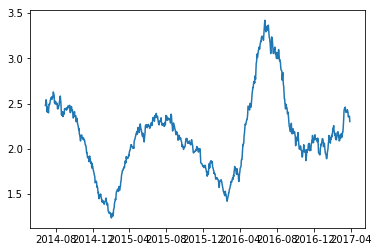

In [78]:
tmp = data2[(data2.STO_EAN == "3020470080000") & (data2.WEATHER_TYPE_PREVISION == 1)]
plt.plot(tmp.DATE_KEY_CURRENT, tmp.Delta_SUNSHINE_DURATION.rolling(90).mean())
plt.show()

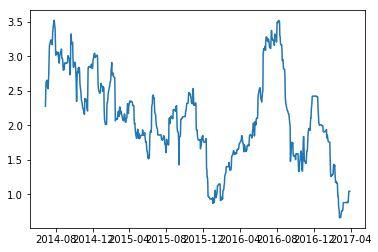

In [85]:
tmp = data2[(data2.STO_EAN == "3020470080000") & (data2.WEATHER_TYPE_PREVISION == 1)]
plt.plot(tmp.DATE_KEY_CURRENT, tmp.Delta_PRECIPITATION_VALUE.rolling(90).mean())
plt.show()

In [102]:
data2.groupby('Ville').STO_EAN.nunique()

Ville
ANNECY CEDEX        1
BASSENS             1
BEAUNE              1
BESANCON CEDEX 4    1
BOURG EN BRESSE     1
CHALON S/SAONE      2
CHAMBERY            1
CRECHES S/SAONE     1
DIJON               1
ECHIROLLES          1
ECOLE VALENTIN      1
ECULLY              1
FEURS               1
FRANCHEVILLE        1
GIVORS              1
ILLZACH             1
JEUXEY              1
L'ISLE D'ABEAU      1
LYON                2
MABLY               1
MENETROL            1
MEYLAN              1
MONTLUCON           1
MOULINS             1
QUETIGNY            1
SALAISE S/SANNE     1
SALLANCHES          1
SEGNY               1
ST EGREVE           1
THIERS              1
VAULX EN VELIN      1
VENISSIEUX          1
VILLEURBANNE        1
Name: STO_EAN, dtype: int64

In [64]:
data2[(data2.STO_EAN == "3020470080000")]

,DATE_KEY_PREVISION,STO_EAN,WEATHER_TYPE_PREVISION,WEATHER_DATETIME_PREVISION,TEMPERATURE_VALUE_AVG_PREVISION,TEMPERATURE_VALUE_MIN_PREVISION,TEMPERATURE_VALUE_MAX_PREVISION,PRECIPITATION_VALUE_PREVISION,SUNSHINE_DURATION_PREVISION,SNOW_DEPTH_PREVISION,...,Code Prolog_x_CURRENT,Code EAN_CURRENT,Code THALES_CURRENT,Code Prolog_y_CURRENT,SNOW_CURRENT,Delta_TEMPERATURE_VALUE_AVG,Delta_TEMPERATURE_VALUE_MAX,Delta_TEMPERATURE_VALUE_MIN,Delta_PRECIPITATION_VALUE,Delta_SUNSHINE_DURATION
0,2014-03-30,3020470080000,1,2014-03-30,11.558,4.260,18.855,0.000,7.015,0.0,...,65809,3020470080000,FRA023,65809,False,0.392,1.055,1.840,0.000,4.864
1,2014-03-30,3020470080000,2,2014-03-31,11.005,3.869,18.141,0.000,9.311,0.0,...,65809,3020470080000,FRA023,65809,False,0.945,0.341,2.231,0.000,7.160
2,2014-03-30,3020470080000,3,2014-04-01,11.109,3.762,18.456,0.000,8.960,0.0,...,65809,3020470080000,FRA023,65809,False,0.841,0.656,2.338,0.000,6.809
3,2014-03-30,3020470080000,4,2014-04-02,13.616,6.146,21.086,0.099,8.428,0.0,...,65809,3020470080000,FRA023,65809,False,1.666,3.286,0.046,0.099,6.277
4,2014-03-30,3020470080000,5,2014-04-03,13.935,7.960,19.911,3.826,3.708,0.0,...,65809,3020470080000,FRA023,65809,False,1.985,2.111,1.860,3.826,1.557
5,2014-03-30,3020470080000,6,2014-04-04,11.029,7.239,14.819,1.213,3.789,0.0,...,65809,3020470080000,FRA023,65809,False,0.921,2.981,1.139,1.213,1.638
6,2014-03-30,3020470080000,7,2014-04-05,11.501,6.511,16.490,10.746,6.300,0.0,...,65809,3020470080000,FRA023,65809,False,0.449,1.310,0.411,10.746,4.149
7,2014-03-30,3020470080000,8,2014-04-06,11.810,6.033,17.587,1.540,6.009,0.0,...,65809,3020470080000,FRA023,65809,False,0.140,0.213,0.067,1.540,3.858
8,2014-03-30,3020470080000,9,2014-04-07,12.358,6.635,18.081,0.790,7.709,0.0,...,65809,3020470080000,FRA023,65809,False,0.408,0.281,0.535,0.790,5.558
9,2014-03-30,3020470080000,10,2014-04-08,12.103,5.908,18.298,0.090,7.436,0.0,...,65809,3020470080000,FRA023,65809,False,0.153,0.498,0.192,0.090,5.285


In [17]:
tmp = current_meteo[data.STO_EAN == 3020470080000][["DATE_KEY", "TEMPERATURE_VALUE_AVG"]]
tmp.iplot(kind='scatter')

C:\Users\ROZASR\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
tmp = current_meteo[data.STO_EAN == 3020474420000] [["DATE_KEY", "SUNSHINE_DURATION"]]
plt.plot(tmp.DATE_KEY, tmp.SUNSHINE_DURATION)
plt.show()

In [105]:
STO_EAN = data.sample(1).STO_EAN.sample(1)
STO_EAN

471357    3020470060000
Name: STO_EAN, dtype: int64

In [89]:
temp.groupby("DATE_KEY").count()

,TEMPERATURE_VALUE_AVG
DATE_KEY,
2014-03-30,1
2014-03-31,1
2014-04-01,1
2014-04-02,1
2014-04-03,1
2014-04-04,1
2014-04-05,1
2014-04-06,1
2014-04-07,1


In [16]:
data

,DATE_KEY,STO_EAN,WEATHER_TYPE,WEATHER_DATETIME,TEMPERATURE_VALUE_AVG,TEMPERATURE_VALUE_MIN,TEMPERATURE_VALUE_MAX,PRECIPITATION_VALUE,SUNSHINE_DURATION,SNOW_DEPTH,SUNSHINE_DURATION_PCT,LIBELE,Code Postal,Ville,SNOW
0,2014-03-30,3020470080000,0,2014-03-29,10.050,1.500,18.600,0.000,5.670,0.0,45.000,CHAMBERY -BASSENS,73000,BASSENS,False
1,2014-03-30,3020470080000,1,2014-03-30,11.558,4.260,18.855,0.000,7.015,0.0,55.456,CHAMBERY -BASSENS,73000,BASSENS,False
2,2014-03-30,3020470080000,2,2014-03-31,11.005,3.869,18.141,0.000,9.311,0.0,73.317,CHAMBERY -BASSENS,73000,BASSENS,False
3,2014-03-30,3020470080000,3,2014-04-01,11.109,3.762,18.456,0.000,8.960,0.0,70.183,CHAMBERY -BASSENS,73000,BASSENS,False
4,2014-03-30,3020470080000,4,2014-04-02,13.616,6.146,21.086,0.099,8.428,0.0,65.759,CHAMBERY -BASSENS,73000,BASSENS,False
5,2014-03-30,3020470080000,5,2014-04-03,13.935,7.960,19.911,3.826,3.708,0.0,28.819,CHAMBERY -BASSENS,73000,BASSENS,False
6,2014-03-30,3020470080000,6,2014-04-04,11.029,7.239,14.819,1.213,3.789,0.0,29.335,CHAMBERY -BASSENS,73000,BASSENS,False
7,2014-03-30,3020470080000,7,2014-04-05,11.501,6.511,16.490,10.746,6.300,0.0,48.587,CHAMBERY -BASSENS,73000,BASSENS,False
8,2014-03-30,3020470080000,8,2014-04-06,11.810,6.033,17.587,1.540,6.009,0.0,46.164,CHAMBERY -BASSENS,73000,BASSENS,False
9,2014-03-30,3020470080000,9,2014-04-07,12.358,6.635,18.081,0.790,7.709,0.0,58.926,CHAMBERY -BASSENS,73000,BASSENS,False
